<a href="https://colab.research.google.com/github/mostafa-ja/mal_adv4/blob/main/KDE0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

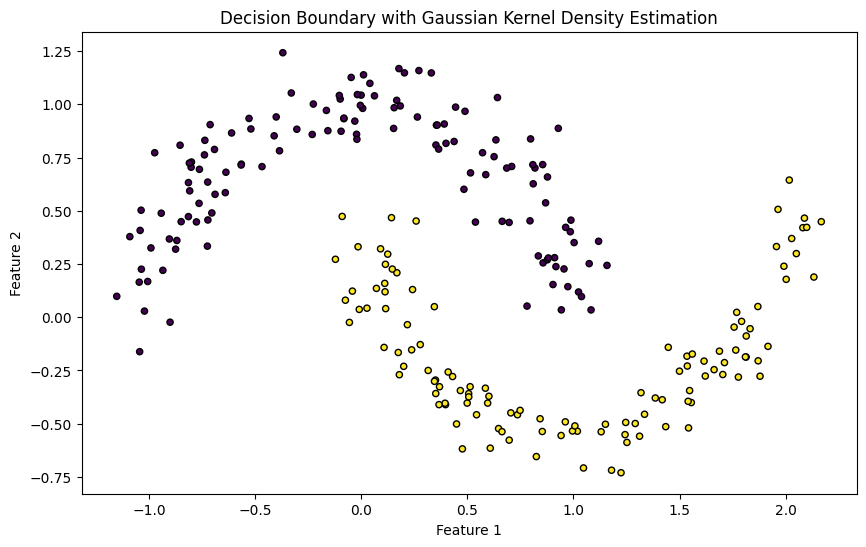

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate the dataset
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)
plt.title("Decision Boundary with Gaussian Kernel Density Estimation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [65]:
def KDE(x, centers, bandwidth,kernel):

    n_samples, n_features = X.shape
    n_train_samples = centers.shape[0]
    u = np.abs(x[:, None, :] - centers)

    if kernel == 'gaussian':
        scores = (np.exp(-0.5 * np.sum(u**2, axis=-1) / bandwidth**2)).mean(axis=1)
        normalization_constant = (2 * np.pi * bandwidth**2) ** (n_features / 2)
    else :
        scores = (np.exp(-np.sum(u, axis=-1) / bandwidth)).mean(axis=1)
        normalization_constant = (2 * bandwidth) ** n_features



    return scores / normalization_constant

Accuracy: 1.00


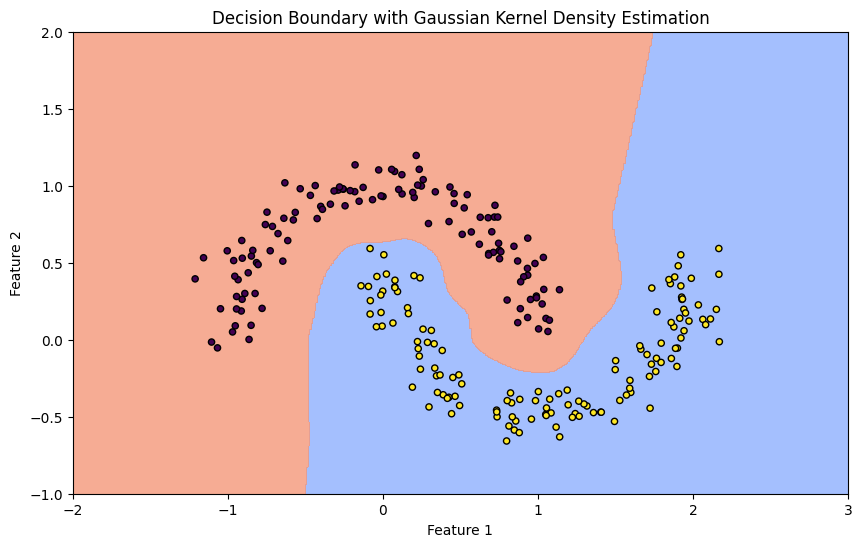

In [80]:
bandwidth = 0.1
kernel = 'gaussian'

# Compute density scores for the test set
dens_benign = KDE(X_test, X_train[y_train == 0], bandwidth,kernel)
dens_malware = KDE(X_test, X_train[y_train == 1], bandwidth,kernel)

# Step 3: Classify samples based on KDE
y_pred = np.where(dens_benign > dens_malware, 0, 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the dataset and decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_malware_grid = KDE(grid, X_train[y_train == 1], bandwidth,kernel)

decision = dens_benign_grid > dens_malware_grid
decision = decision.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, decision, cmap='coolwarm', alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20)
plt.title("Decision Boundary with Gaussian Kernel Density Estimation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [67]:
bens = X_test[y_test==0]
mals = X_test[y_test==1]
print(KDE(bens[:10], X_train[y_train == 0], bandwidth,kernel))
print(KDE(mals[:10], X_train[y_train == 0], bandwidth,kernel))

[0.39886128 0.83882155 0.1903426  0.722536   0.95418685 0.60313501
 0.7517505  1.23604367 0.48428539 0.56912891]
[2.06988290e-06 5.43713339e-06 2.45436997e-06 5.09419977e-08
 1.24492756e-07 3.91559736e-08 8.14033812e-13 3.02309926e-09
 3.42176698e-05 1.61756589e-11]


In [68]:
print(KDE(bens[:10], X_train[y_train == 1], bandwidth,kernel))
print(KDE(mals[:10], X_train[y_train == 1], bandwidth,kernel))

[2.73366221e-11 3.25545424e-16 8.97287255e-14 1.79957013e-14
 2.05821868e-09 1.52731345e-06 1.04377462e-07 3.82631089e-06
 2.16472710e-15 4.50068740e-05]
[0.53453268 0.95170179 0.95223539 0.8667929  1.61702554 0.60624112
 1.28369681 0.89910769 0.80400404 1.27740132]


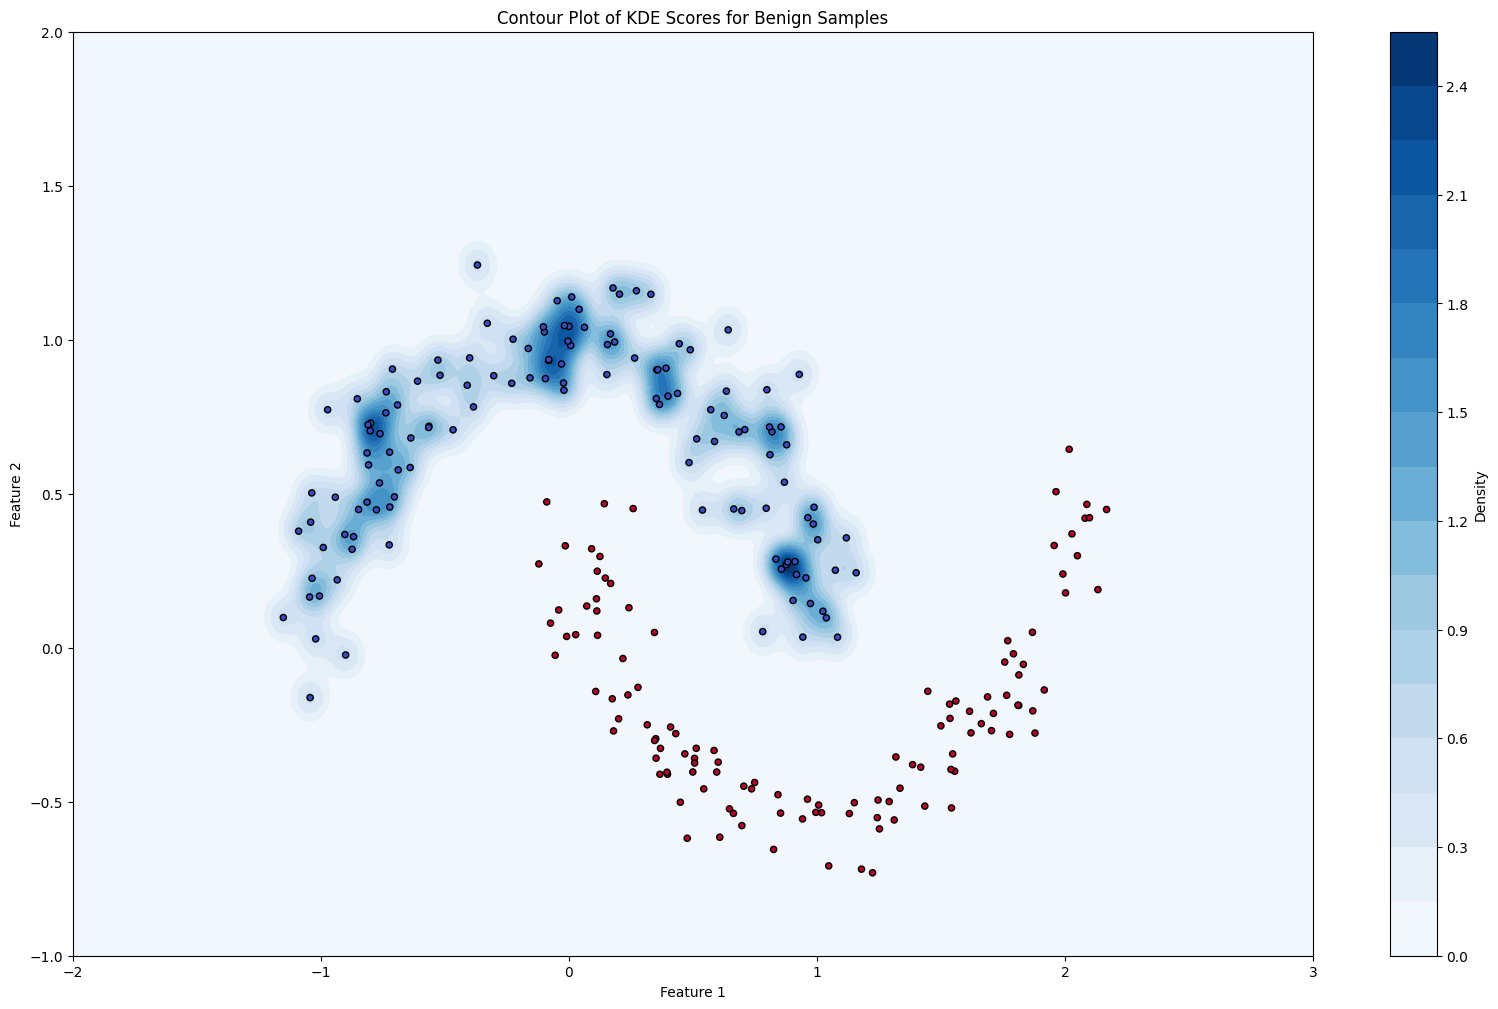

In [69]:
# Fit KDE model for benign class
bandwidth = 0.05
kernel = 'gaussian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

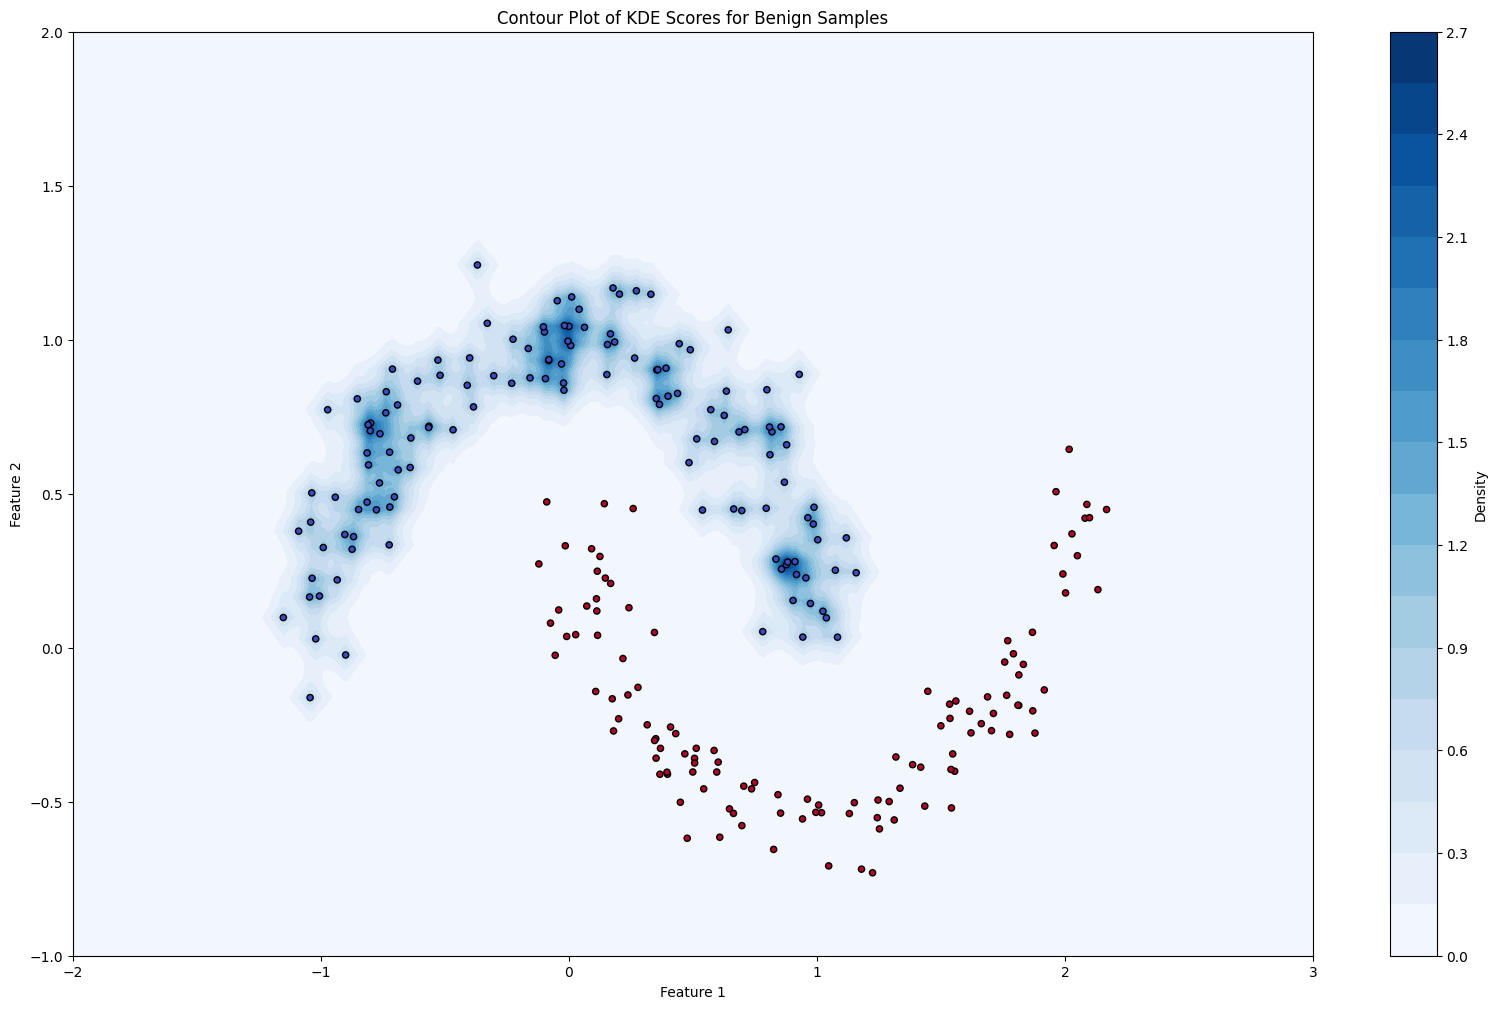

In [70]:
# Fit KDE model for benign class
bandwidth = 0.05
kernel = 'laplacian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

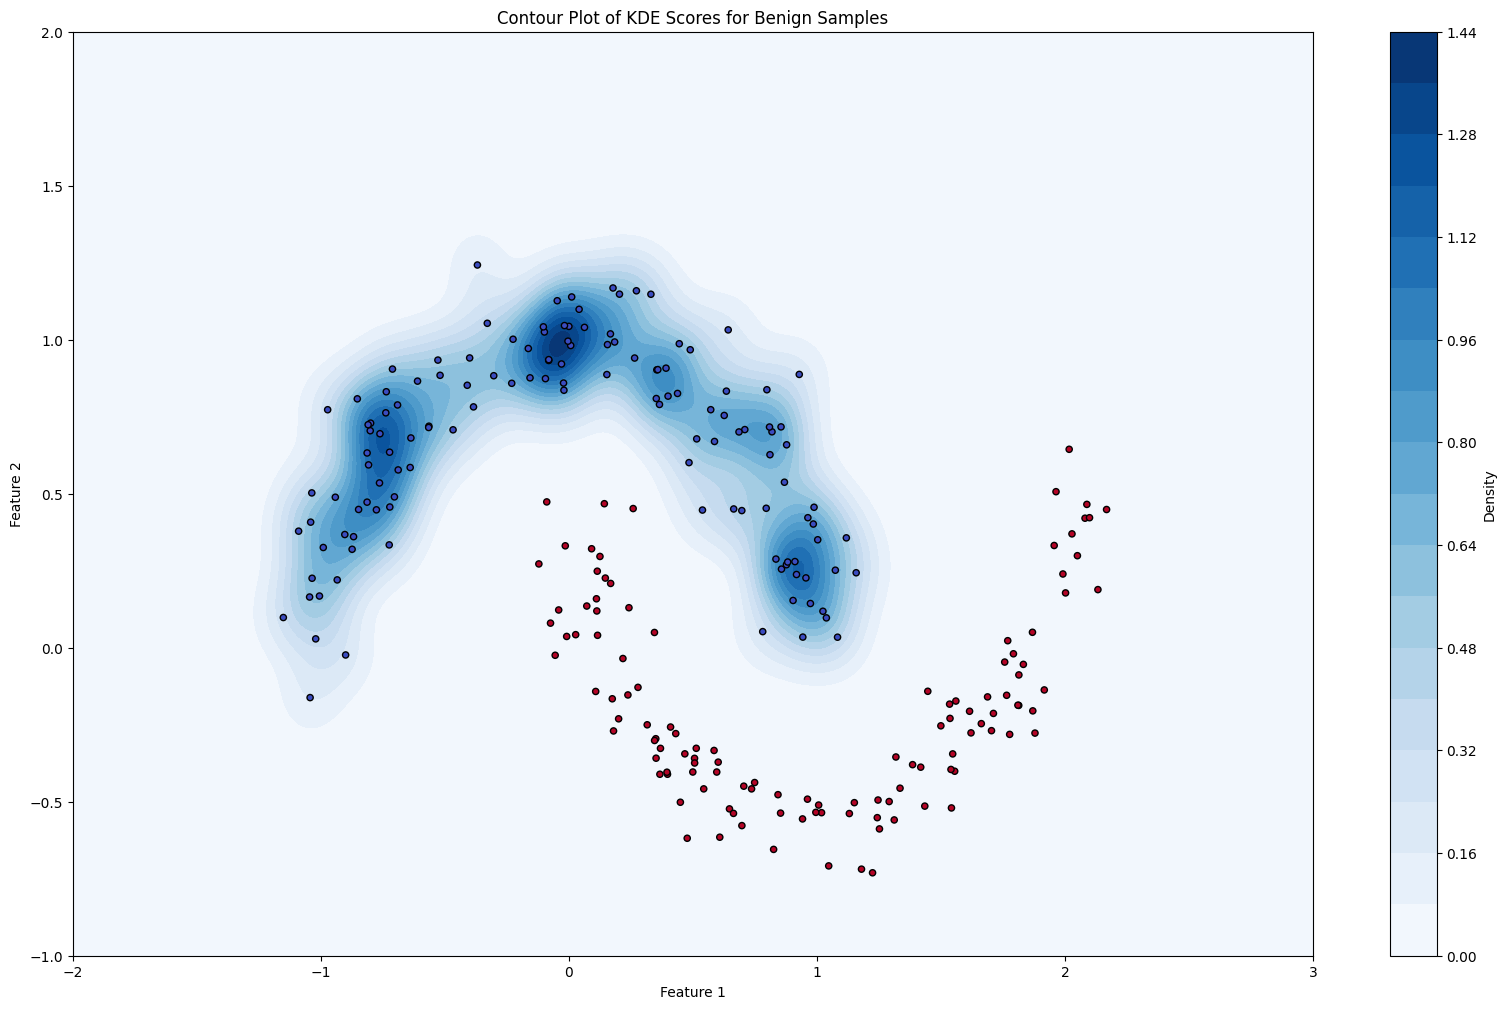

In [71]:
# Fit KDE model for benign class
bandwidth = 0.1
kernel = 'gaussian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

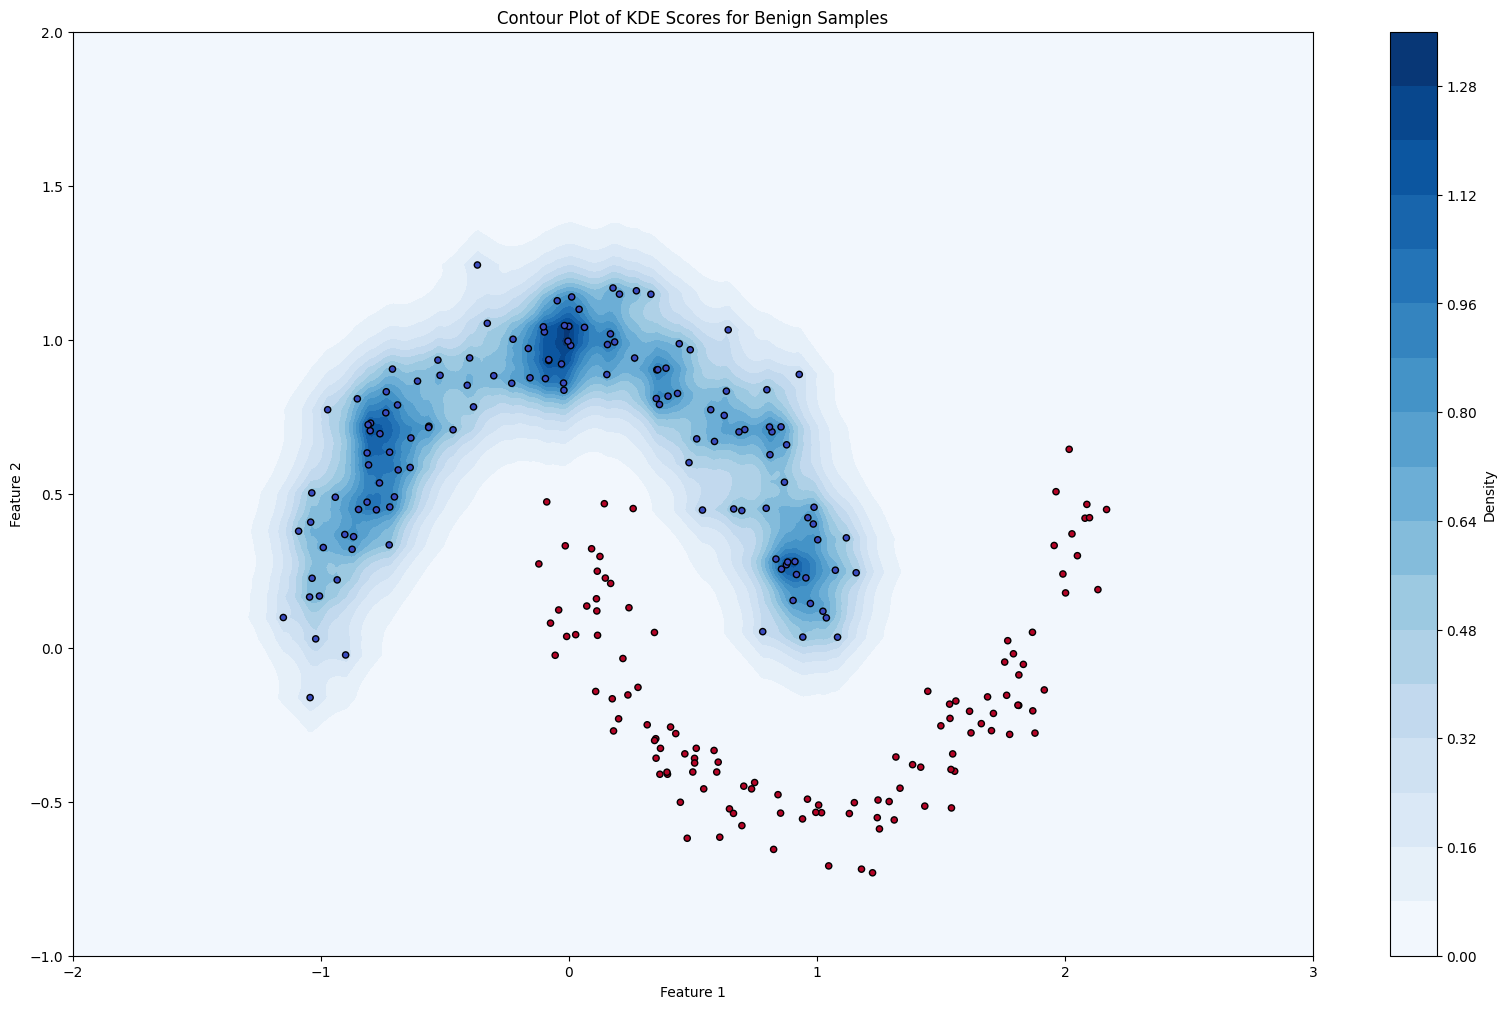

In [72]:
# Fit KDE model for benign class
bandwidth = 0.1
kernel = 'laplacian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

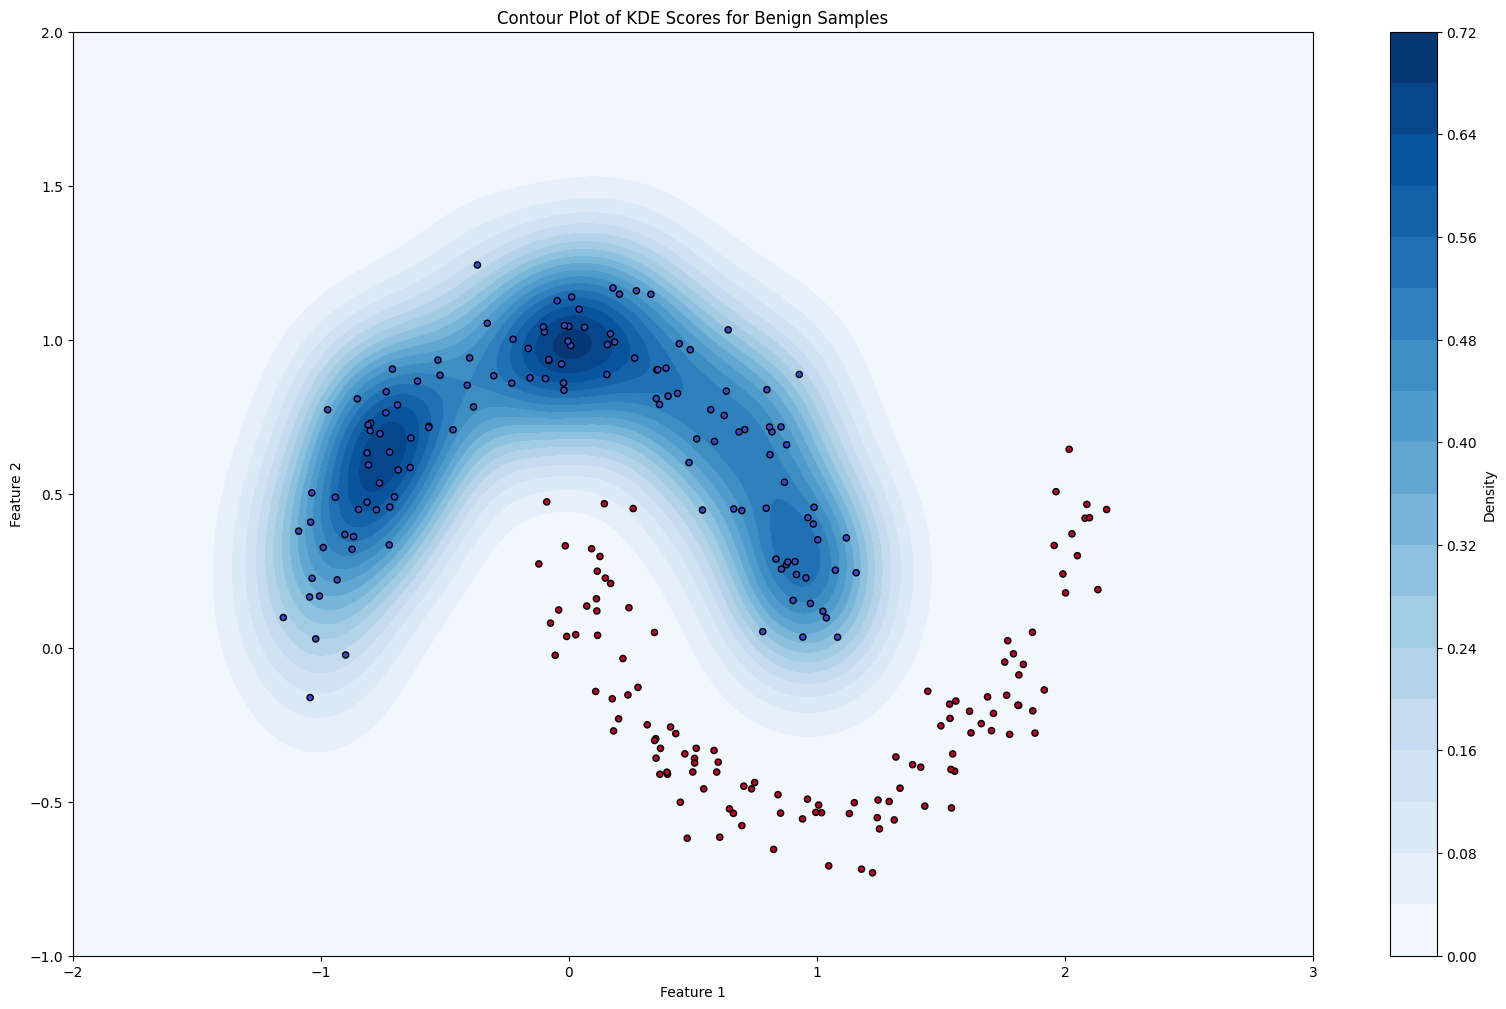

In [26]:
# Fit KDE model for benign class
bandwidth = 0.2
kde_benign = GaussianKDE(bandwidth)
kde_benign.fit(X_train[y_train == 0])

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = kde_benign.score_samples(grid)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

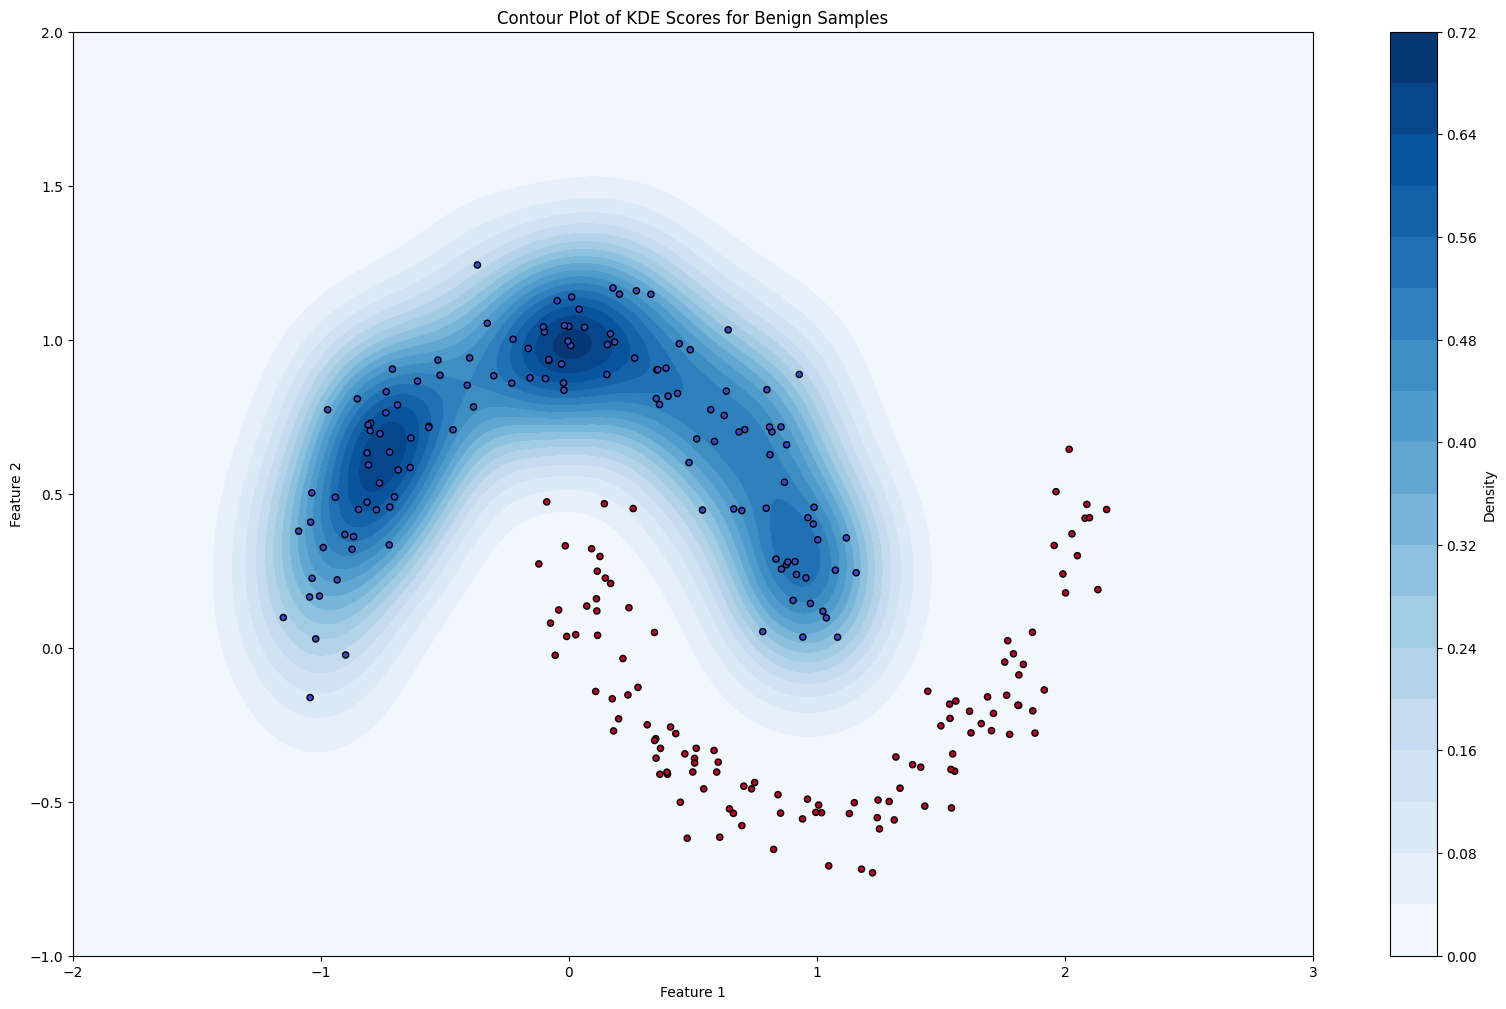

In [73]:
# Fit KDE model for benign class
bandwidth = 0.2
kernel = 'gaussian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

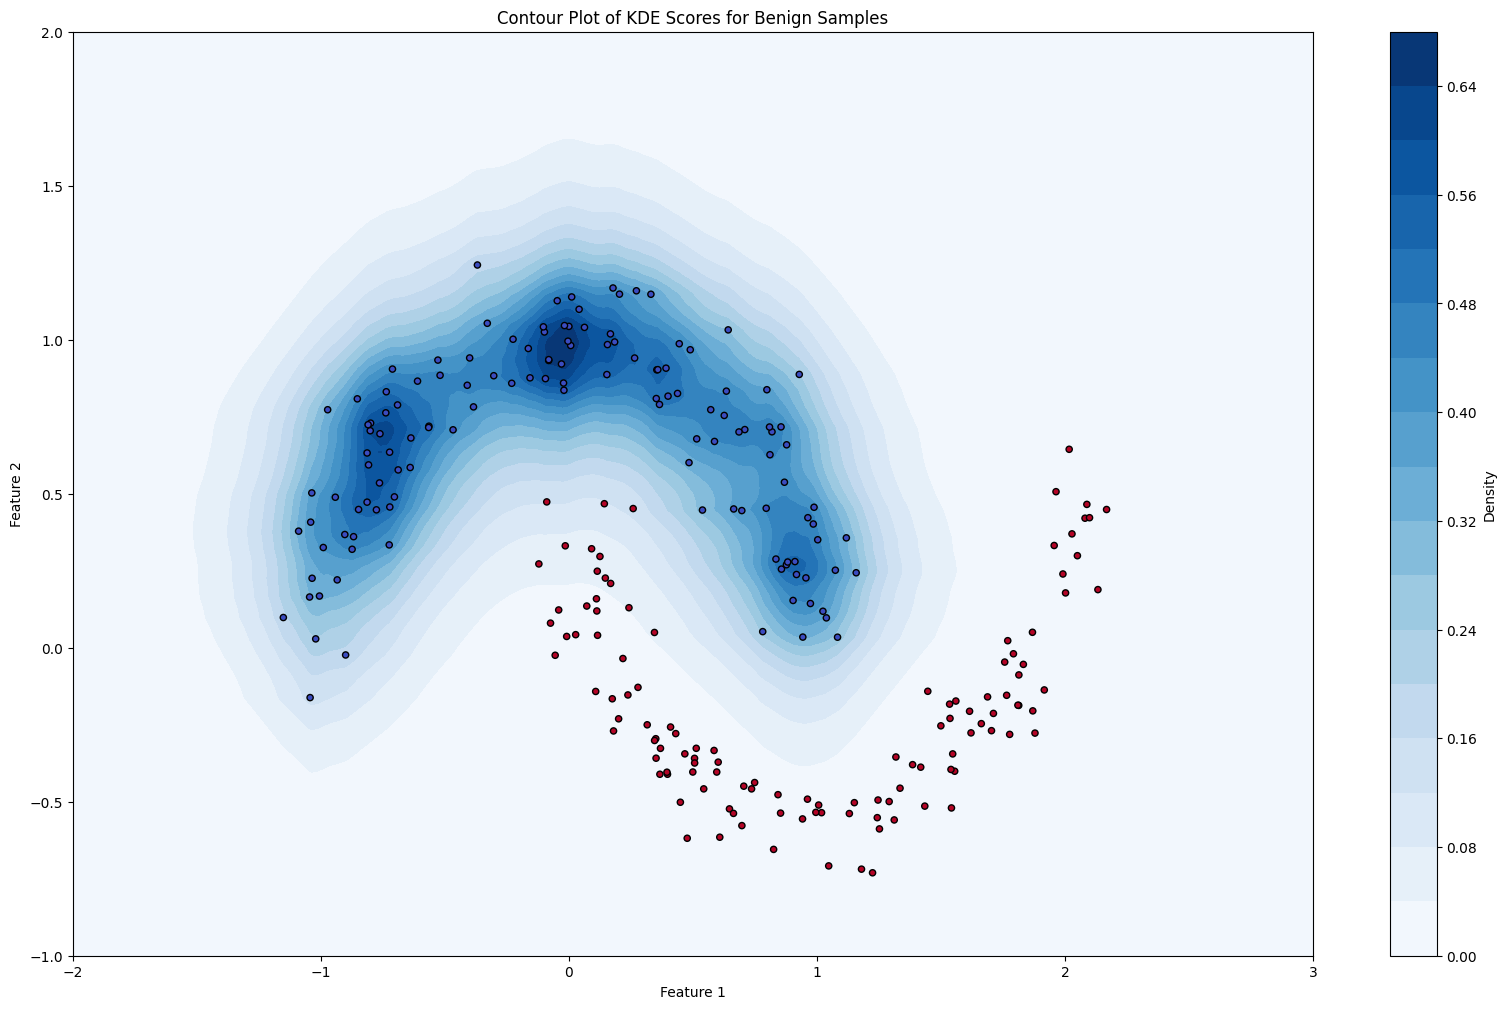

In [74]:
# Fit KDE model for benign class
bandwidth = 0.2
kernel = 'laplacian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

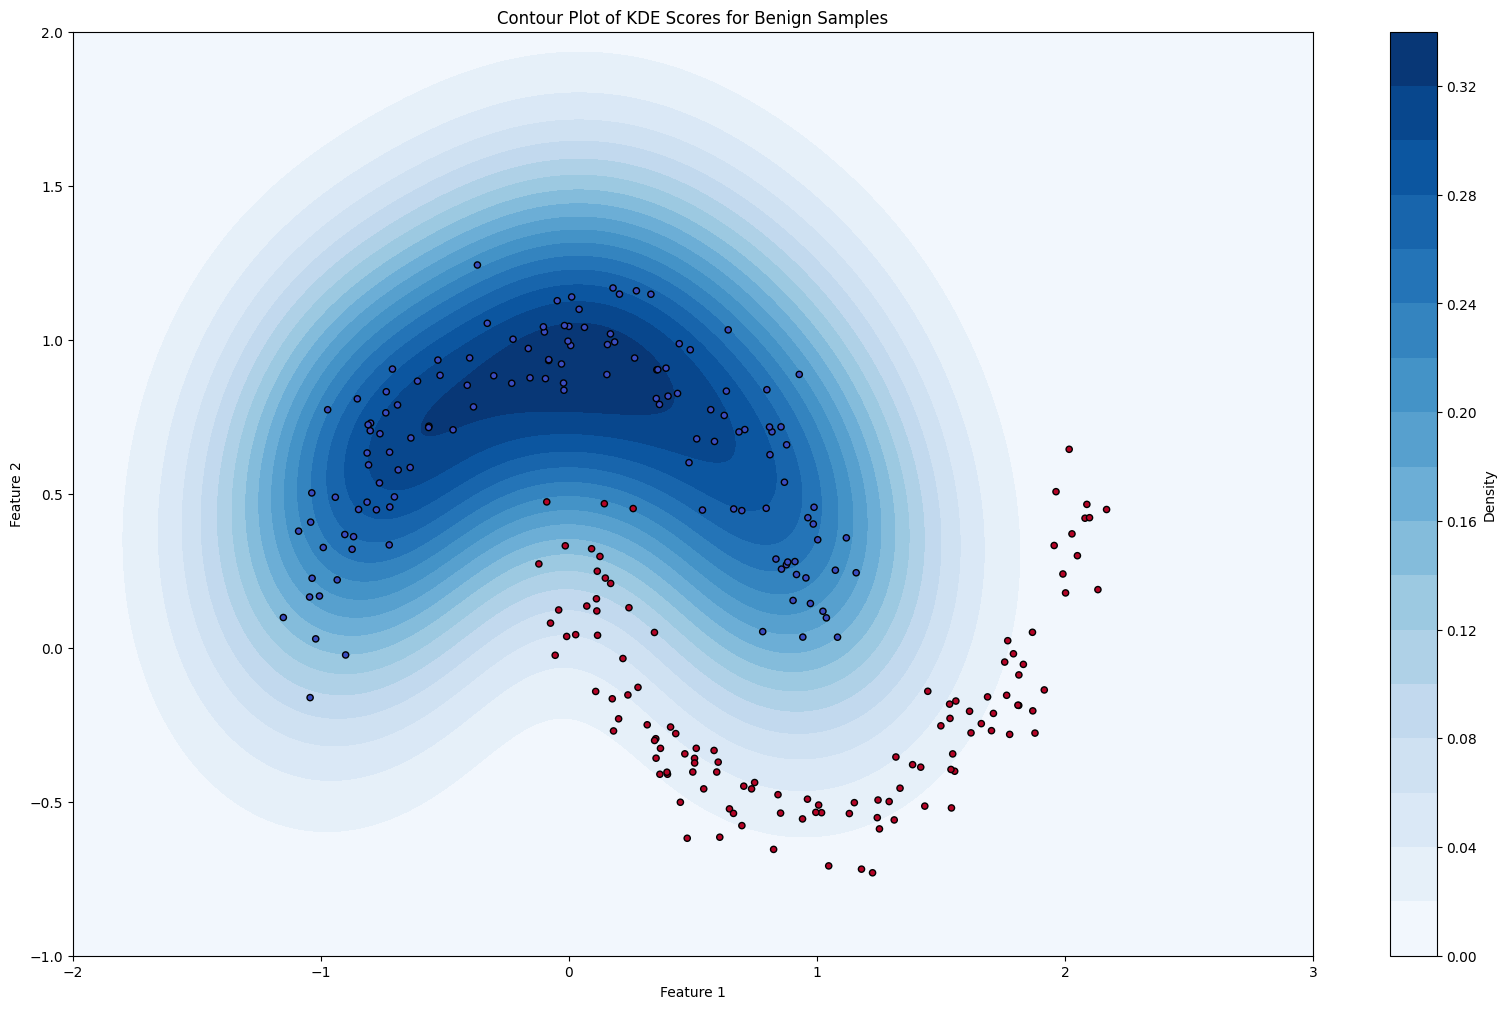

In [75]:
# Fit KDE model for benign class
bandwidth = 0.4
kernel = 'gaussian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

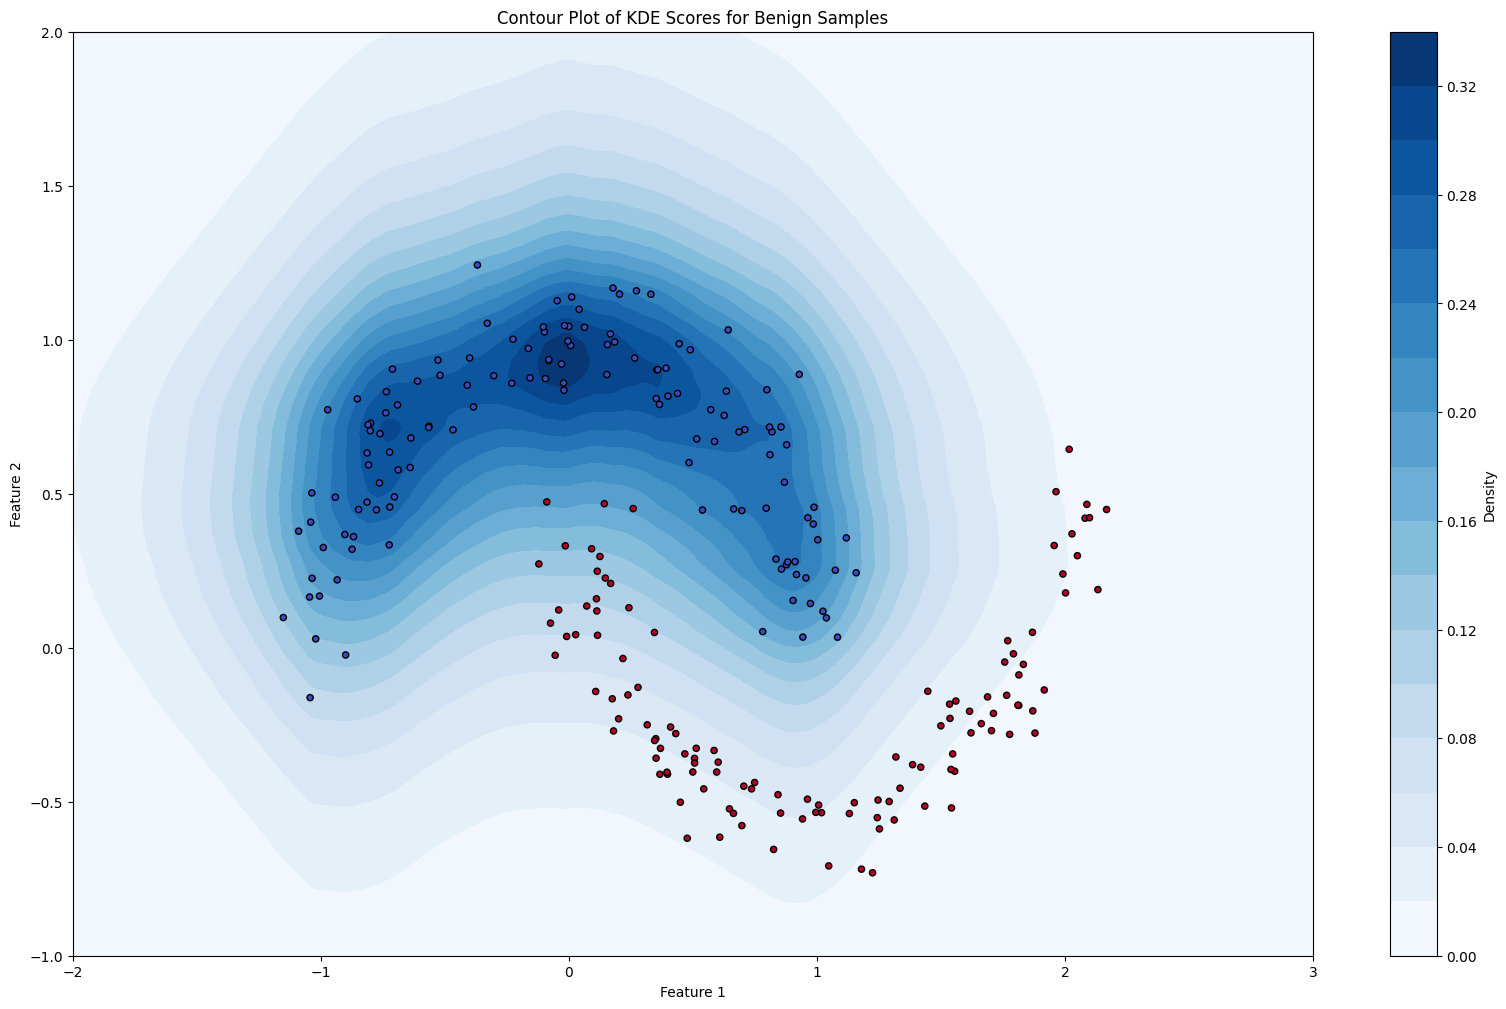

In [76]:
# Fit KDE model for benign class
bandwidth = 0.4
kernel = 'laplacian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#Gradients

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,balanced_accuracy_score
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pickle
import random
import time


In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_losses(loss1, loss2, loss3, loss4):
    """
    Plots three lists of loss values against iterations using seaborn.

    Parameters:
    loss1 (list): First list of loss values.
    loss2 (list): Second list of loss values.
    loss3 (list): Third list of loss values.
    loss4 (list): Third list of loss values.
    """
    # Create a list of iterations based on the length of the loss lists
    iterations = list(range(1, len(loss1) + 1))

    # Create a DataFrame
    data = pd.DataFrame({
        'Iteration': iterations * 4,
        'Loss': loss1 + loss2 + loss3 + loss4,
        'Type': ['Loss1'] * len(loss1) + ['Loss2'] * len(loss2) + ['Loss3'] * len(loss3)+ ['Loss4'] * len(loss4)
    })

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='Iteration', y='Loss', hue='Type')
    plt.title('Loss vs. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend(title='Loss Type')
    plt.grid(True)
    plt.show()



In [152]:
def KDE(x, centers, bandwidth, kernel='laplacian'):
    n_samples, n_features = x.shape
    n_train_samples = centers.shape[0]
    u = torch.abs(x[:, None, :] - centers)

    if kernel == 'gaussian':
        scores = torch.exp(-0.5 * torch.sum(u**2, dim=-1) / bandwidth**2).mean(dim=1)
        normalization_constant = (2 * torch.pi * bandwidth**2) ** (n_features / 2)
    elif kernel == 'laplacian':
        scores = torch.exp(-torch.sum(u, dim=-1) / bandwidth).mean(dim=1)
        normalization_constant = (2 * bandwidth) ** n_features
    else:
        raise ValueError("Unsupported kernel. Use 'gaussian' or 'laplacian'.")

    return scores / normalization_constant

def pgd(x, centers, criterion, bandwidth, kernel, step_length=0.02, k=100, norm='linf'):
    eps = 1e-10
    x_next = x.clone()

    trajectories = [x_next.clone().detach().cpu().numpy()]
    loss_steps_i = []

    for t in range(k):
        x_var = x_next.clone().detach().requires_grad_(True)
        k = KDE(x_var, centers, bandwidth, kernel)
        if criterion == 'log':
            loss = -torch.log(k + eps)
        else:
            loss = -k

        loss_steps_i.append(k.mean().detach().item())

        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)

        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
        elif norm == 'free':
            perturbation = gradients
        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
        elif norm == 'l1':
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
        else:
            raise ValueError("Expect 'l1', 'l2', or 'linf' norm.")

        x_next = x_next + step_length * perturbation
        trajectories.append(x_next.clone().detach().cpu().numpy())

    return x_next, loss_steps_i, np.array(trajectories)

In [123]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

bens = X_test_tensor[y_test==0]
mals = X_test_tensor[y_test==1]

In [124]:
x_next, loss_steps_i, trajectories = pgd(mals,X_train_tensor[y_train==0],'log', 0.1,'gaussian',step_length=0.01, k=100, norm='linf')
x_next2,loss_steps_i2, trajectories2 = pgd(mals,X_train_tensor[y_train==0],'linear', 0.1,'gaussian',step_length=0.01, k=100, norm='linf')

In [126]:
KDE(mals[:20], X_train_tensor[y_train==0], 0.1,'gaussian')

tensor([2.0699e-06, 5.4371e-06, 2.4544e-06, 5.0942e-08, 1.2449e-07, 3.9156e-08,
        8.1403e-13, 3.0231e-09, 3.4218e-05, 1.6176e-11, 1.9601e-16, 1.6700e-06,
        8.6254e-04, 3.1936e-26, 3.6388e-06, 2.4638e-05, 9.5240e-06, 4.9537e-12,
        1.6888e-10, 3.1465e-12])

In [127]:
KDE(x_next[:20], X_train_tensor[y_train==0], 0.1,'gaussian')

tensor([0.8169, 0.8186, 0.8165, 1.1310, 1.1337, 0.8177, 1.1328, 1.1320, 1.1331,
        1.1323, 1.0666, 1.1308, 0.8194, 0.3792, 1.1333, 1.4045, 1.1336, 1.1323,
        1.1326, 1.1312])

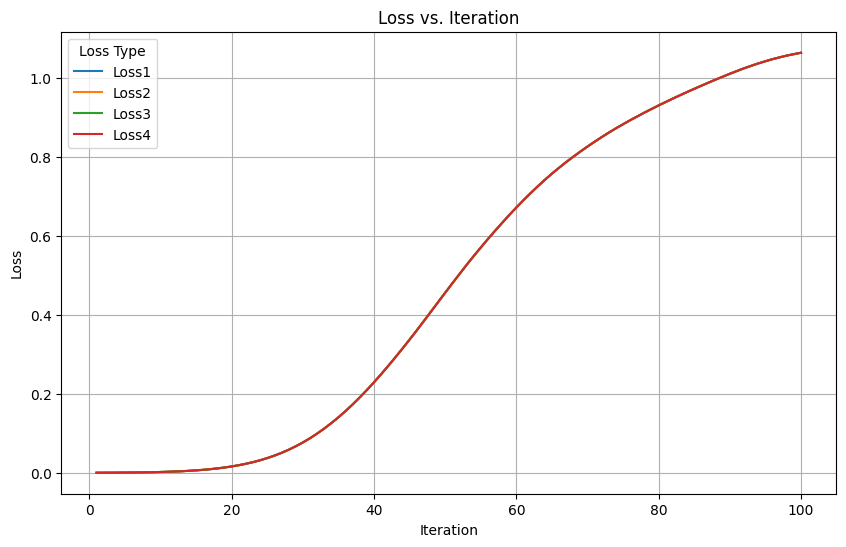

In [128]:
plot_losses(loss_steps_i, loss_steps_i2, loss_steps_i2, loss_steps_i2)

In [129]:
x_next,loss_steps_i, trajectories = pgd(mals,X_train_tensor[y_train==0],'log', 1.,'gaussian',step_length=0.01, k=100, norm='free')
x_next2,loss_steps_i2, trajectories = pgd(mals,X_train_tensor[y_train==0],'linear', 1.,'gaussian',step_length=0.01, k=100, norm='free')

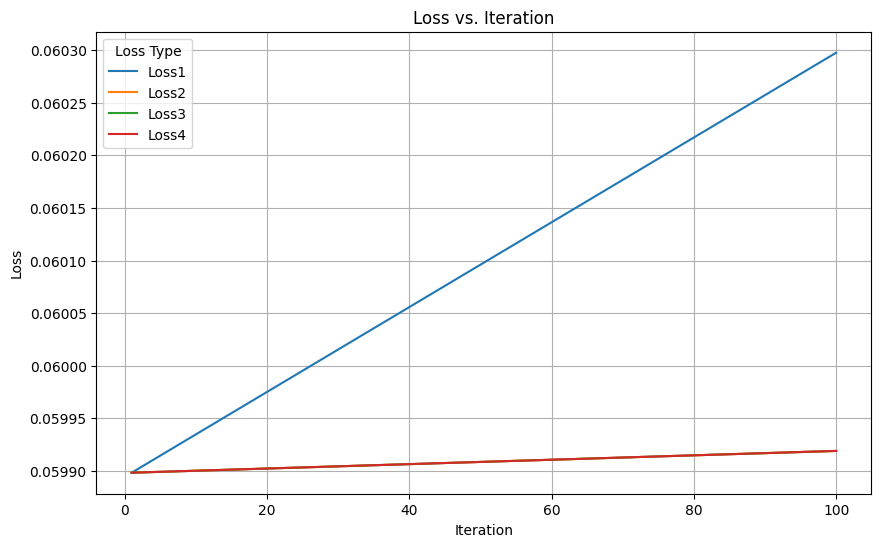

In [130]:
plot_losses(loss_steps_i, loss_steps_i2, loss_steps_i2, loss_steps_i2)

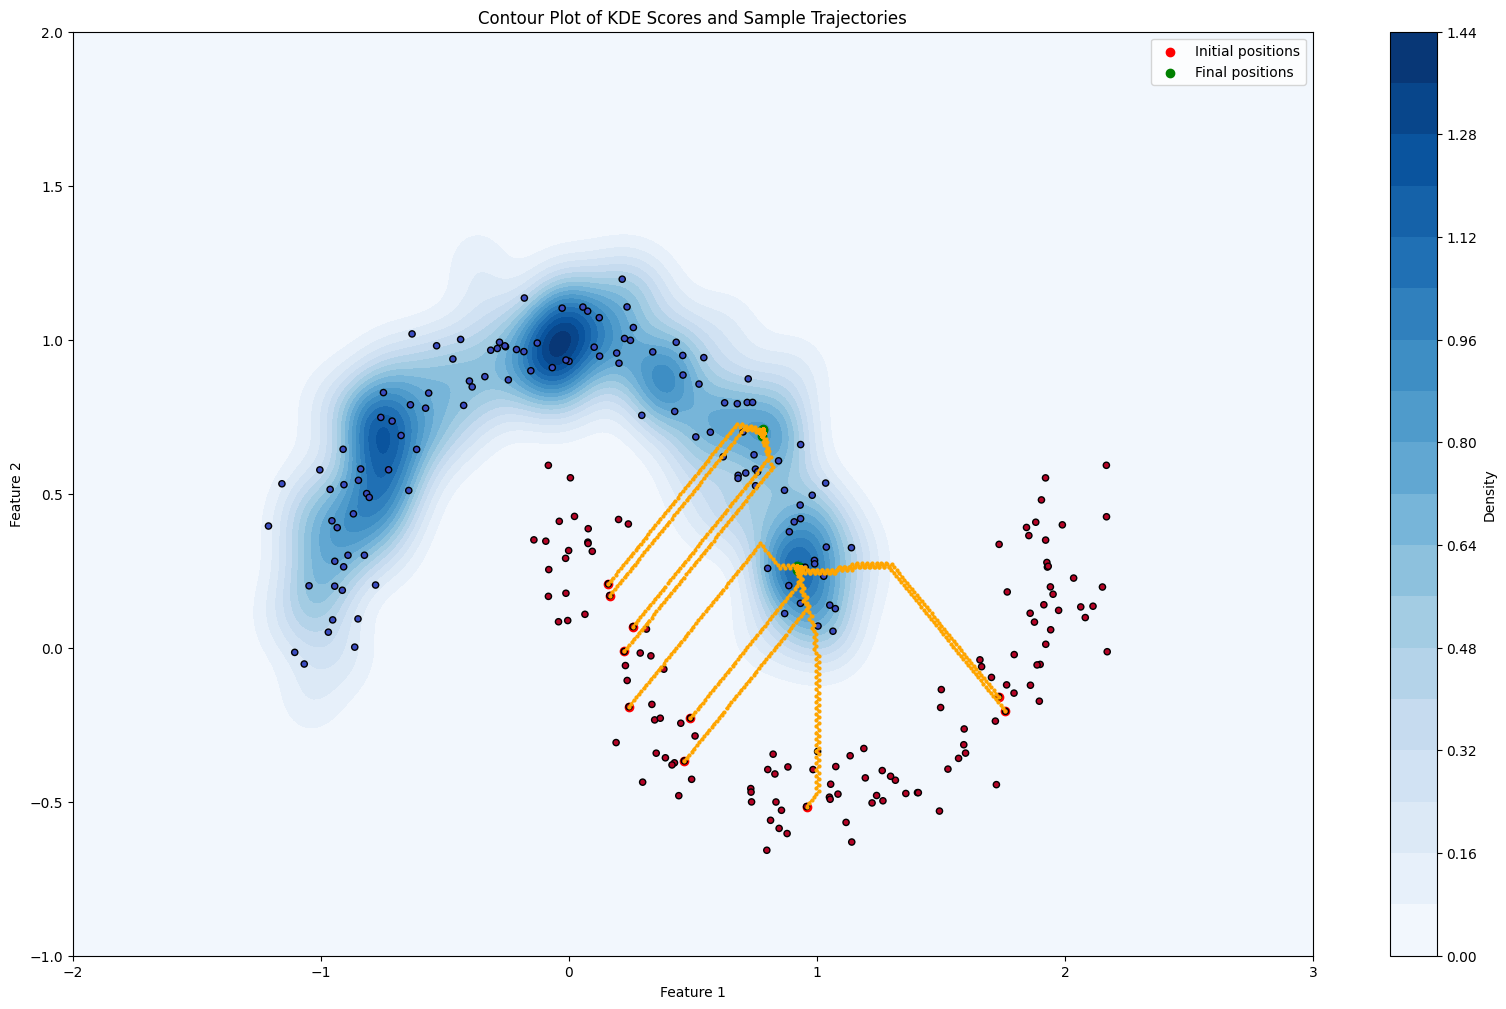

In [141]:
# Fit KDE model for benign class
bandwidth = 0.1
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='gaussian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:10], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=0.01, k=100, norm='linf')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial and final positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the trajectories of the samples
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


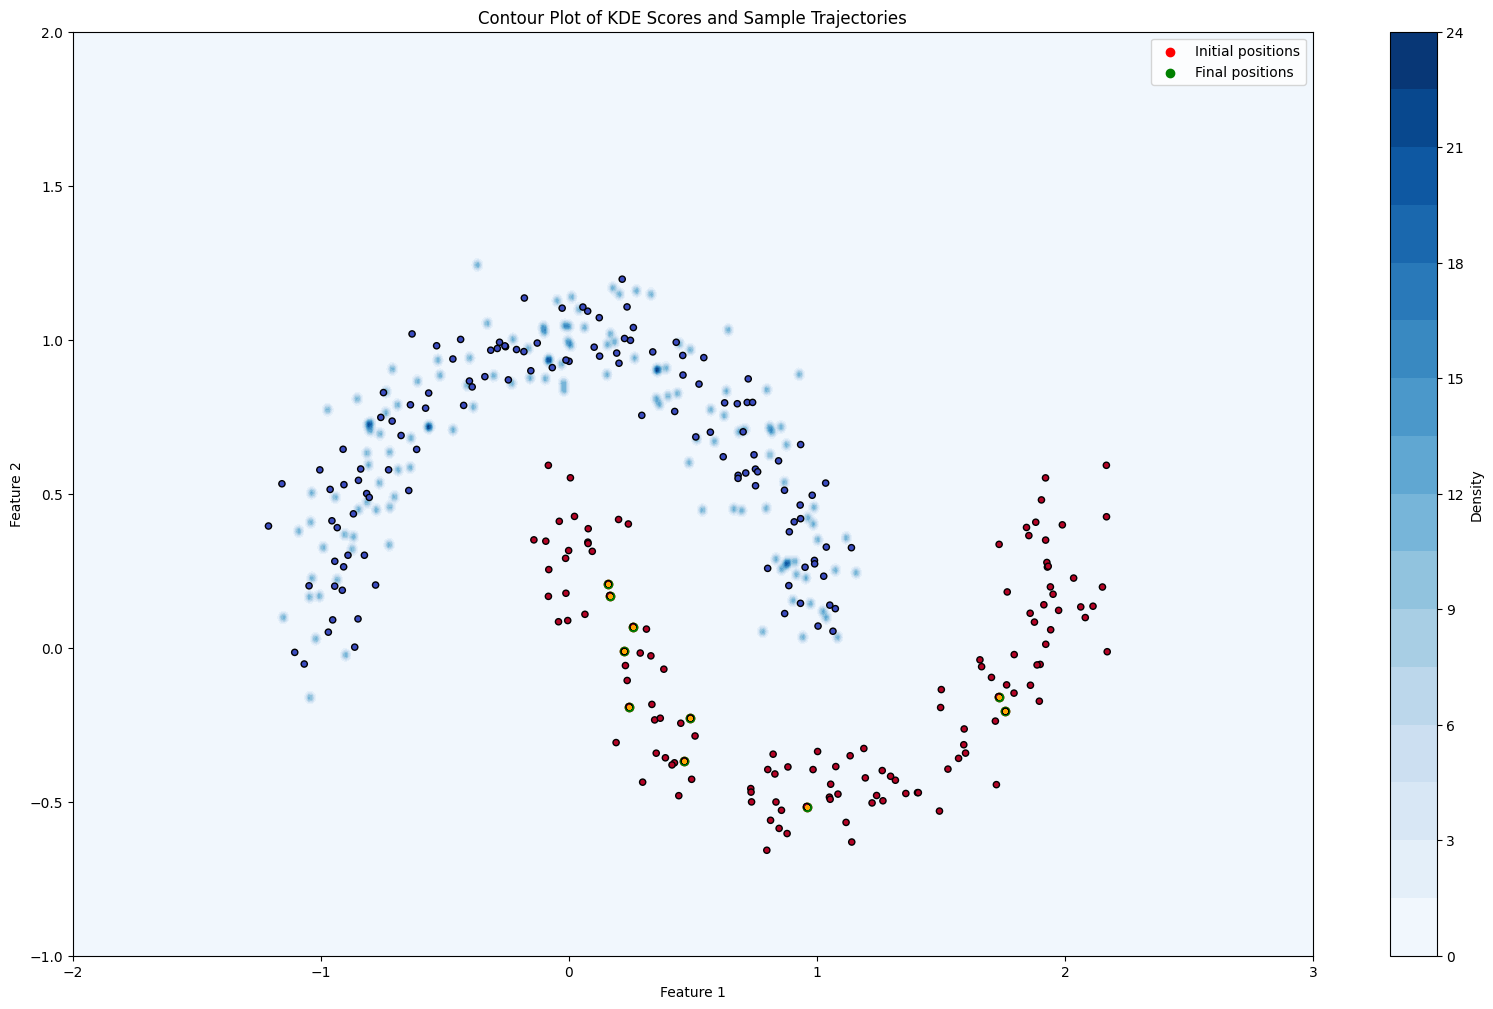

In [142]:
# Fit KDE model for benign class
bandwidth = 0.01
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='gaussian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:10], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=0.01, k=100, norm='linf')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial and final positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the trajectories of the samples
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


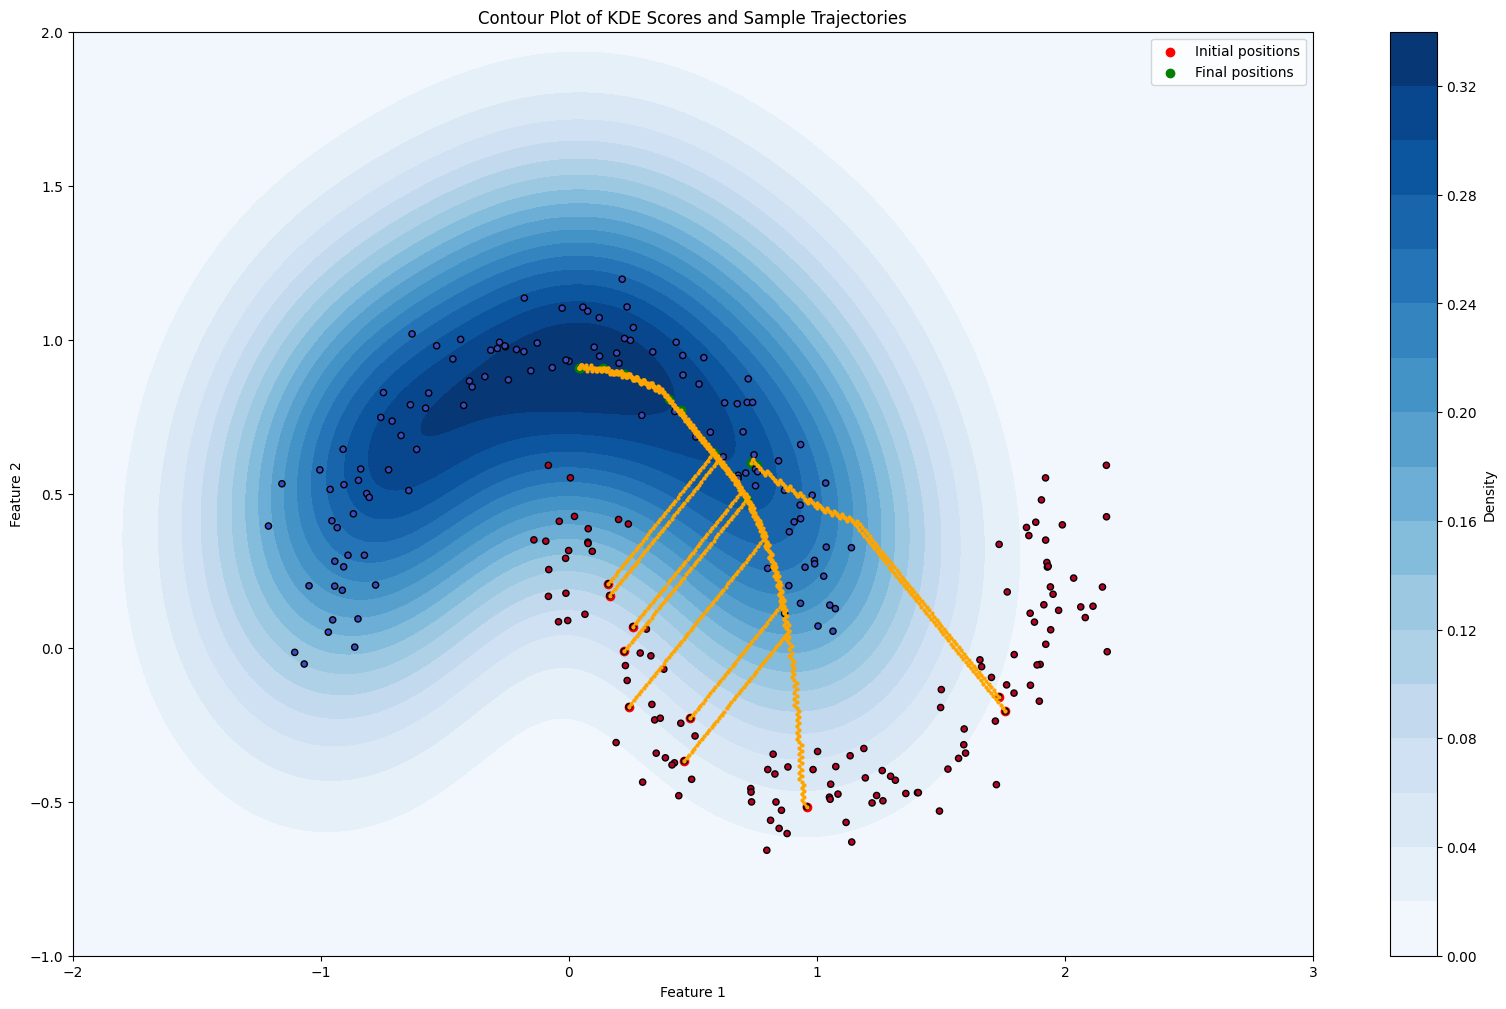

In [143]:
# Fit KDE model for benign class
bandwidth = 0.4
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='gaussian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:10], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=0.01, k=100, norm='linf')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial and final positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the trajectories of the samples
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


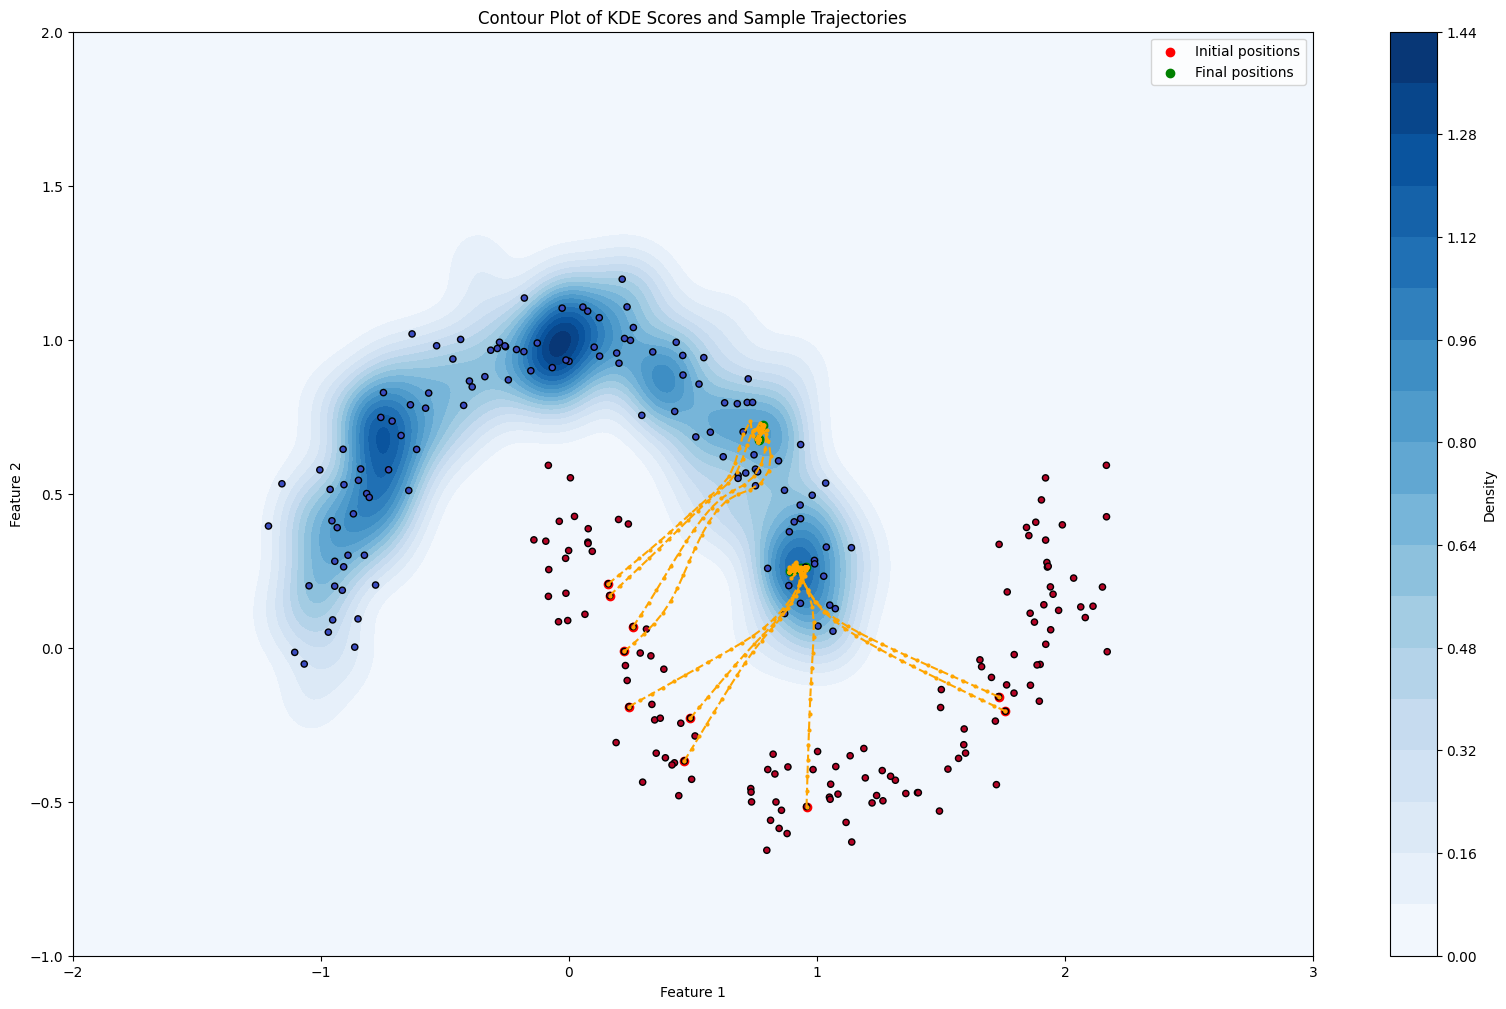

In [146]:
# Fit KDE model for benign class
bandwidth = 0.1
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='gaussian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:10], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=0.05, k=30, norm='l2')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial and final positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the trajectories of the samples
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


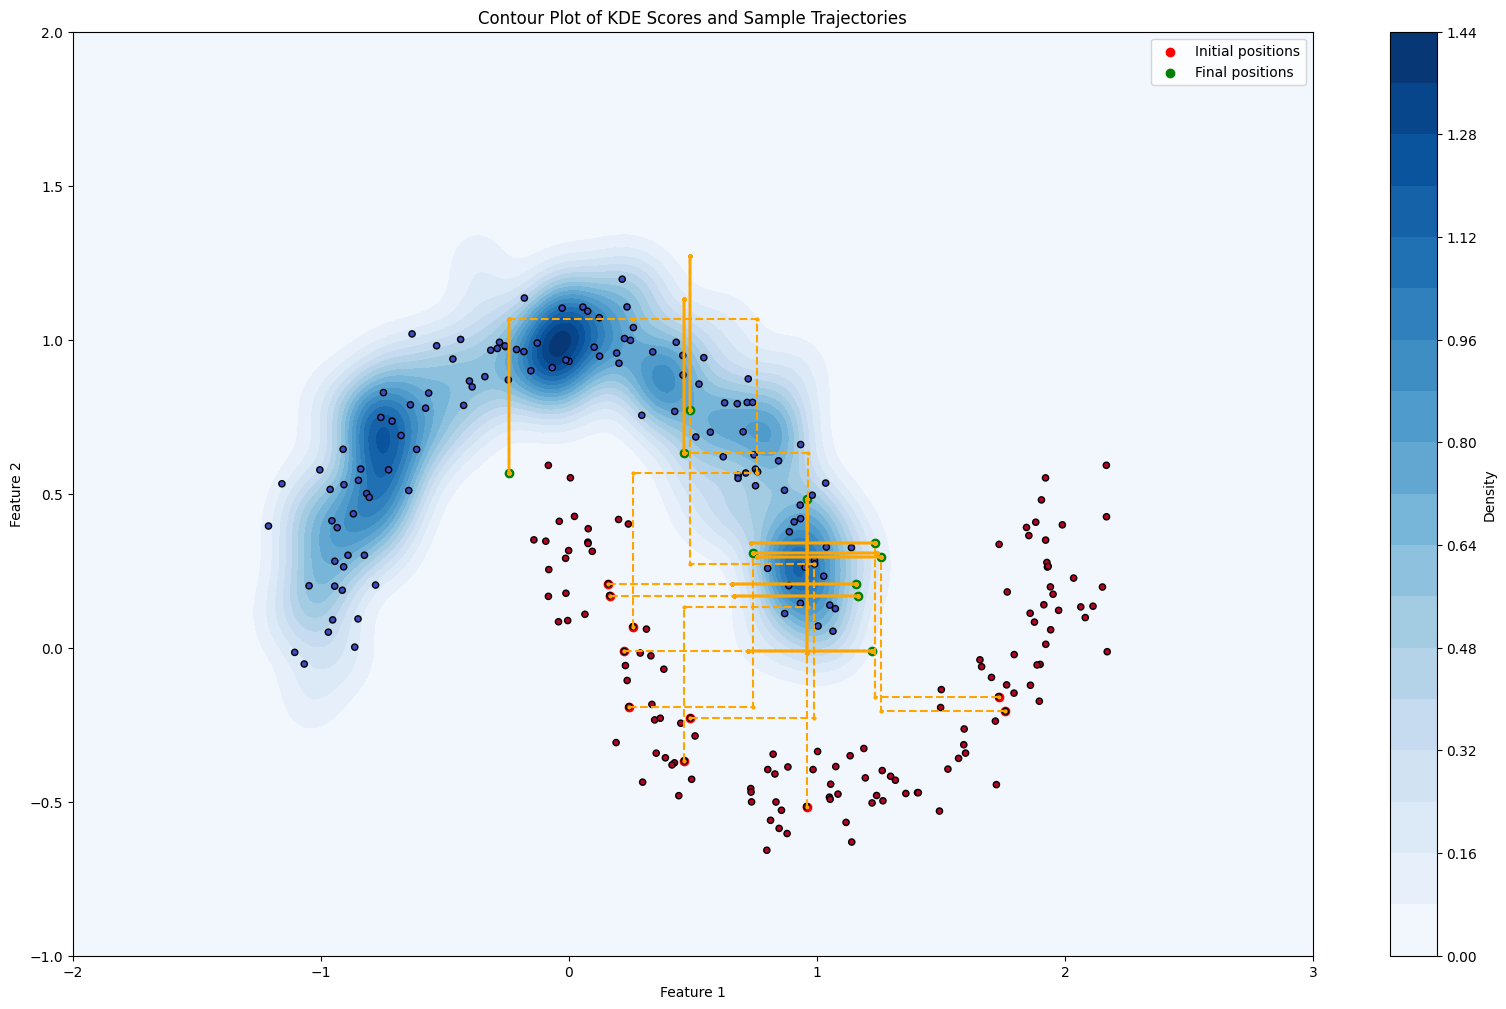

In [154]:
# Fit KDE model for benign class
bandwidth = 0.1
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='gaussian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:10], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=0.5, k=20, norm='l1')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial and final positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the trajectories of the samples
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


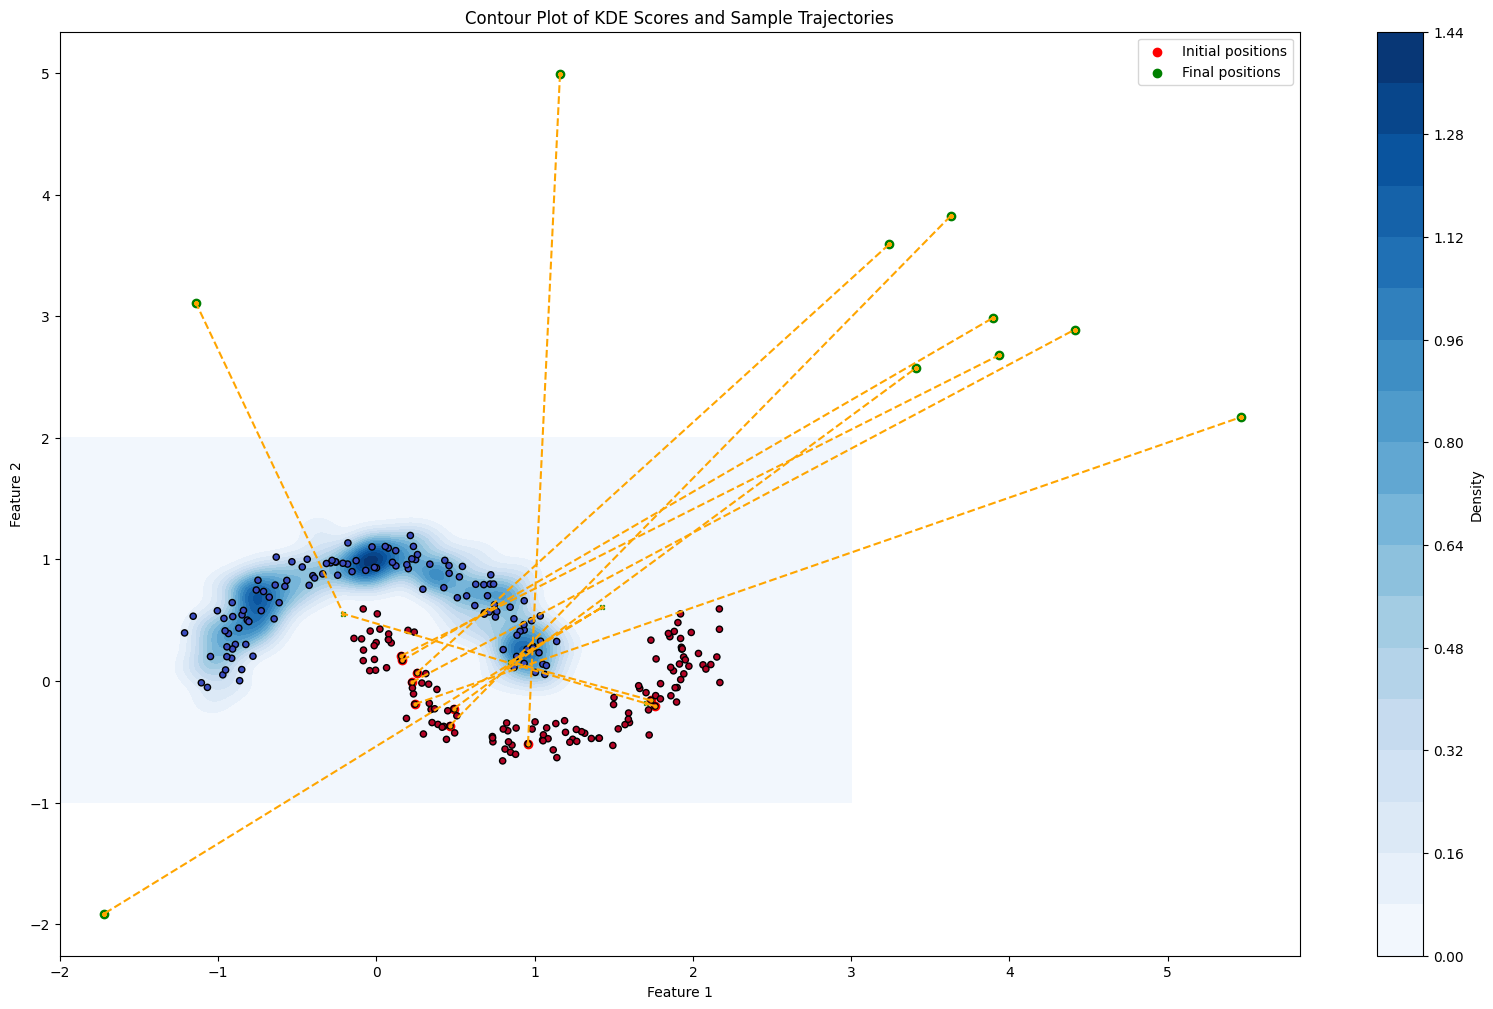

In [168]:
# Fit KDE model for benign class
bandwidth = 0.1
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='gaussian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:10], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=1., k=10, norm='free')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial and final positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the trajectories of the samples
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)
for traj in trajectories:
    plt.scatter(traj[:, 0], traj[:, 1], color='green', marker='x', s=10)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


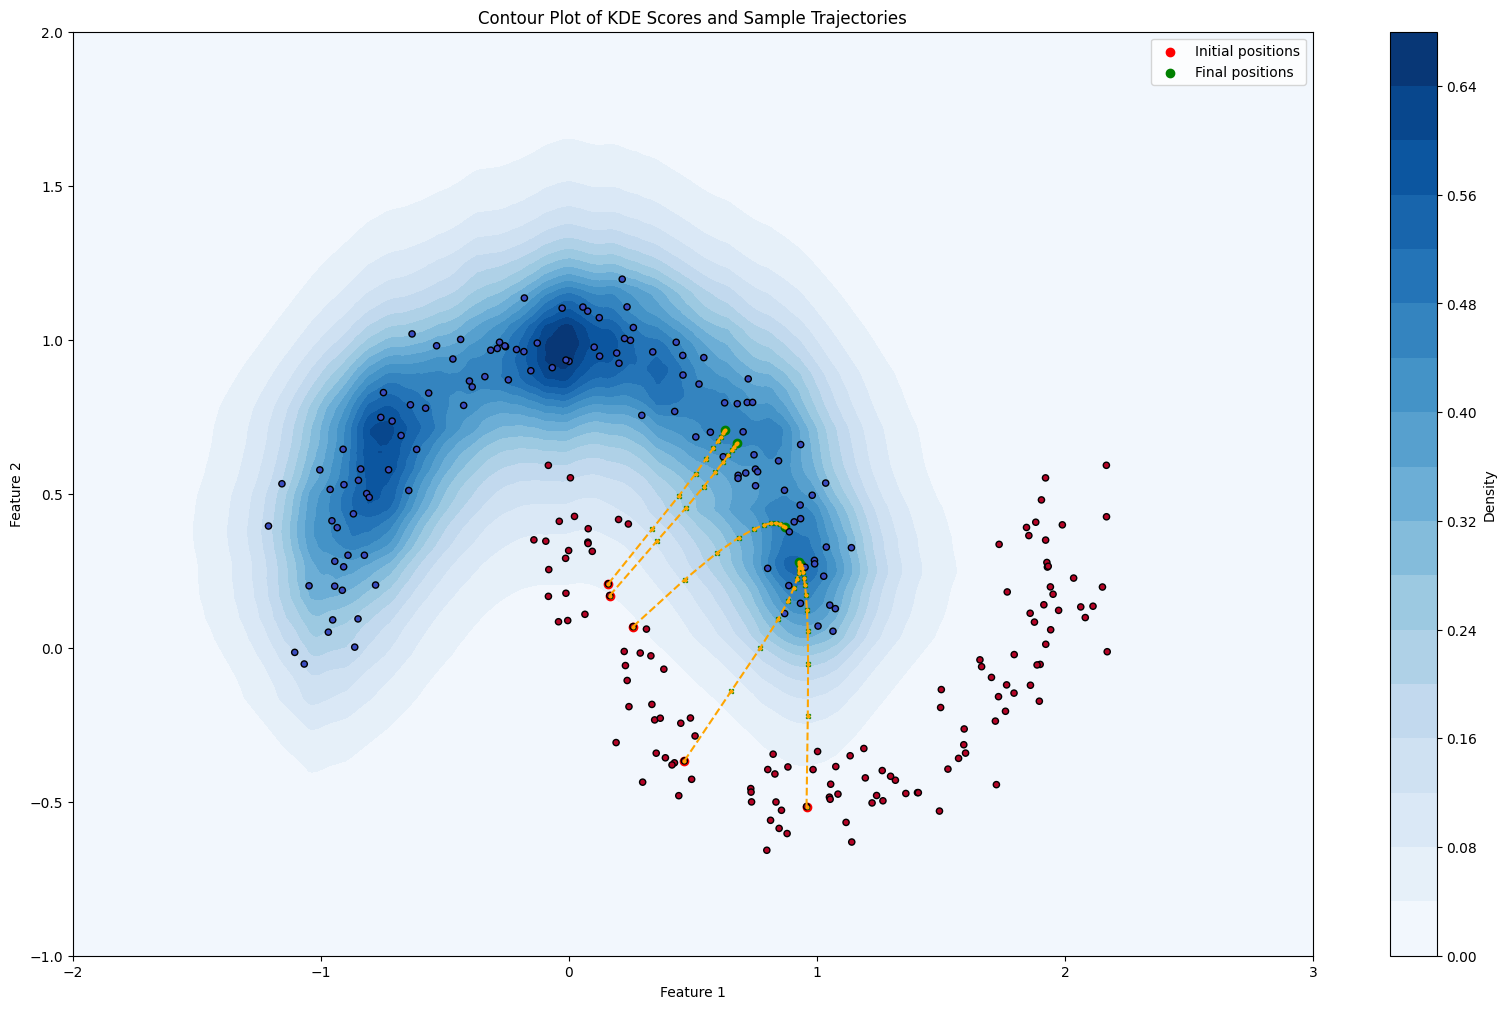

In [163]:
# Fit KDE model for benign class
bandwidth = 0.2
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='laplacian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:5], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=0.1, k=10, norm='free')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the new positions of the samples at each step
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)

for traj in trajectories:
    plt.scatter(traj[:, 0], traj[:, 1], color='green', marker='x', s=10)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

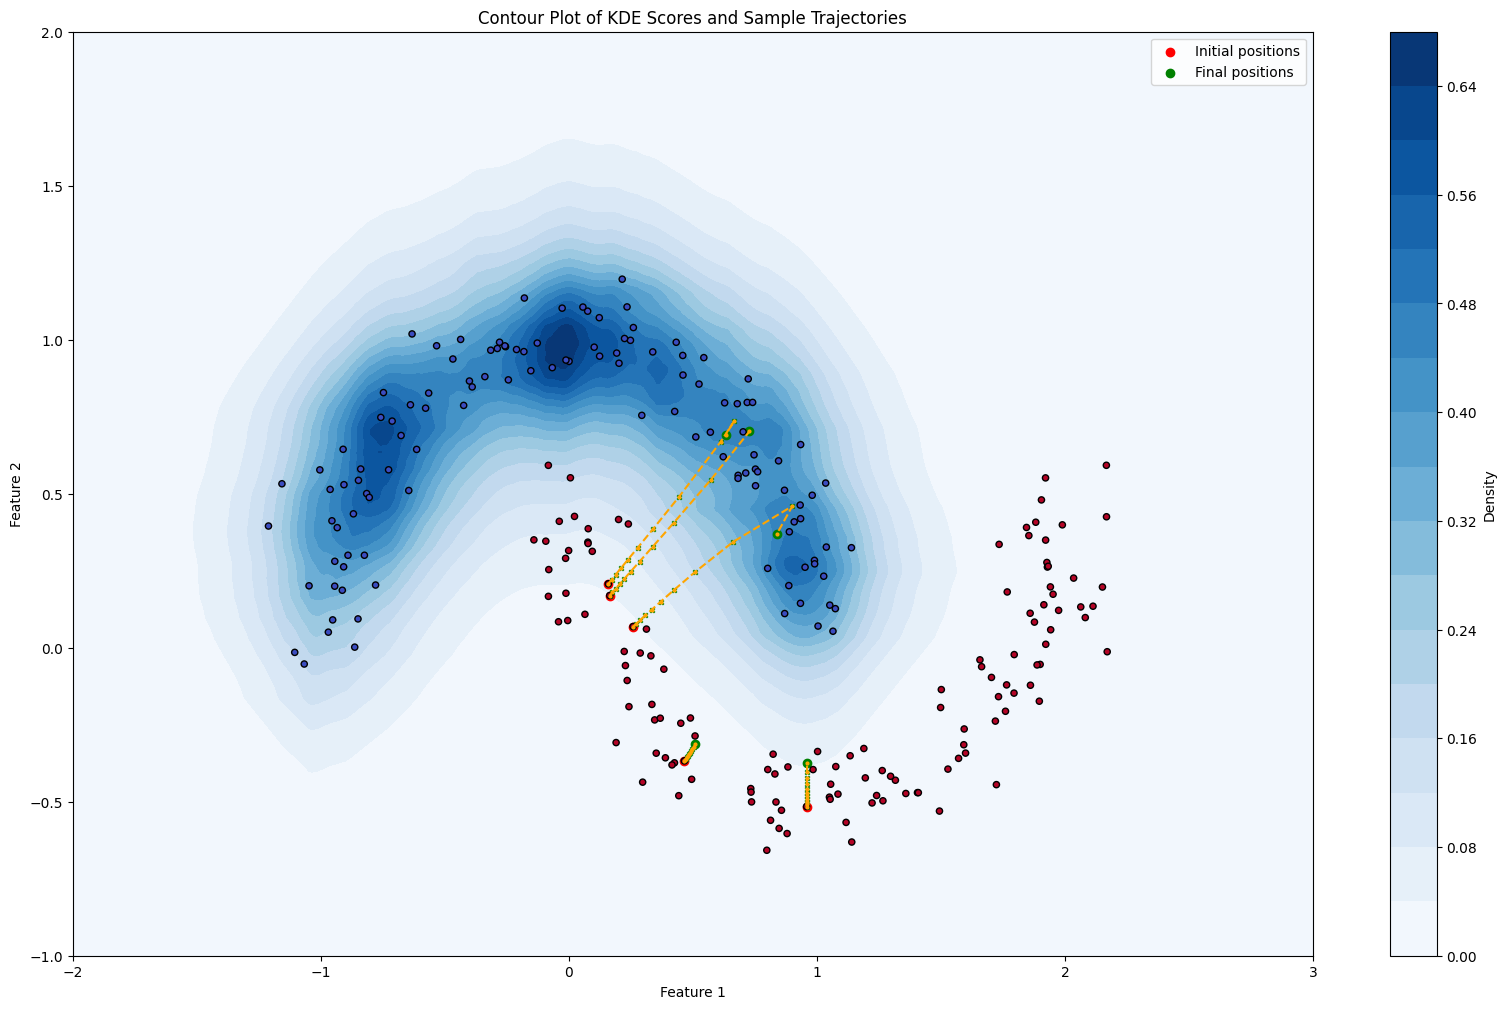

In [166]:
# Fit KDE model for benign class
bandwidth = 0.2
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='laplacian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:5], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'linear', bandwidth, 'gaussian', step_length=1., k=10, norm='free')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the new positions of the samples at each step
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)

for traj in trajectories:
    plt.scatter(traj[:, 0], traj[:, 1], color='green', marker='x', s=10)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()